In [1]:
from scipy.io import loadmat
from framed.io_utils.sbml import load_cbmodel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
sns.set_style("dark")

In [2]:
model = load_cbmodel('../../models/ecoli_core_unfolded.xml', flavor='cobra')

In [3]:
gene_names = pd.read_csv('../../models/mappings_gene_id_name.csv', index_col=0, header=None)
gene_names = dict(gene_names[1])

In [4]:
dumped_data_wt = loadmat('../../results/sampling/wt.mat')
reactions_wt = [x[0][0] for x in dumped_data_wt['reactions']]
data_wt = pd.DataFrame(dumped_data_wt['sample'], index=reactions_wt)

dumped_data_mut = loadmat('../../results/sampling/succ.mat')
reactions_mut = [x[0][0] for x in dumped_data_mut['reactions']]
data_mut = pd.DataFrame(dumped_data_mut['sample'], index=reactions_mut)

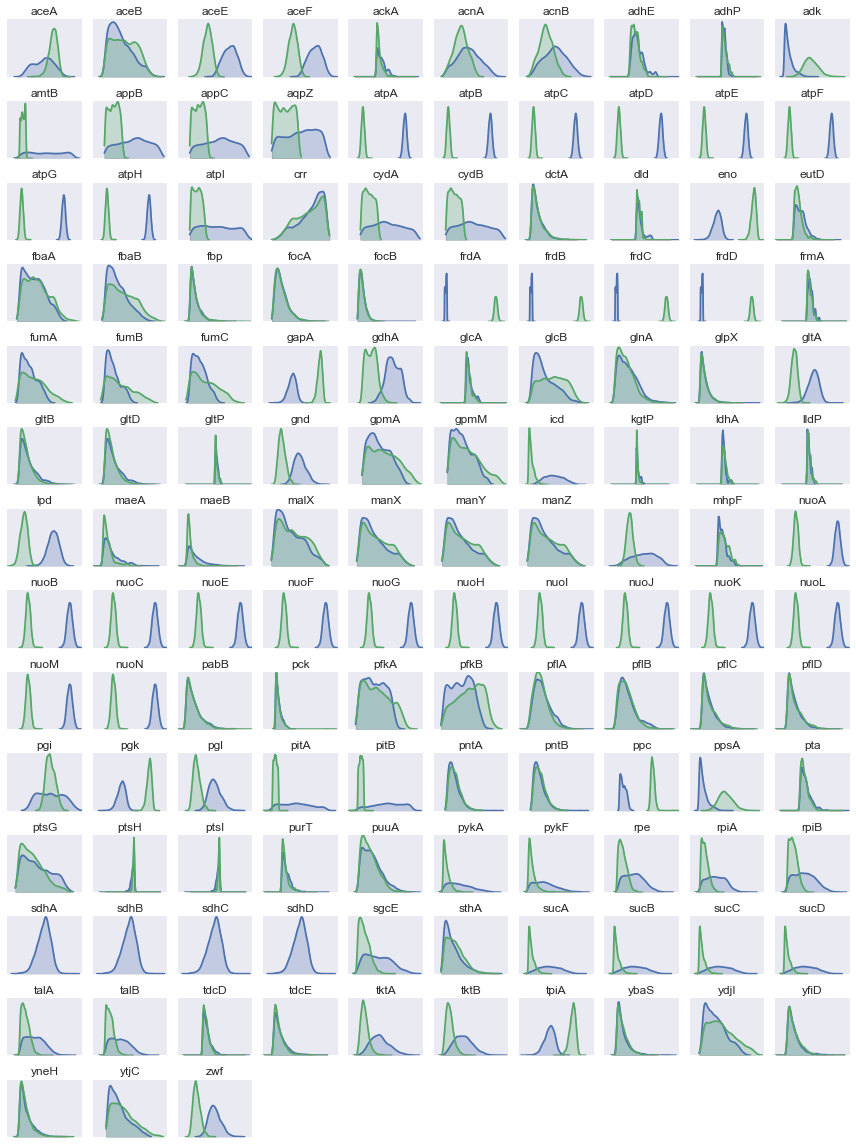

In [10]:
genes = [(r_id, gene_names[r_id[len('u_'):]]) for r_id in reactions_wt if r_id.startswith('u_')]
genes.sort(key=lambda x: x[1])

plt.figure(figsize=(12,16))

for i, (r_id, gene) in enumerate(genes):
    x_wt = data_wt.loc[r_id,:]
    plt.subplot(14, 10, i+1)
    sns.kdeplot(x_wt, shade=True)
    if r_id in reactions_mut:
        x_mut = data_mut.loc[r_id,:]
        sns.kdeplot(x_mut, shade=True)
    plt.yticks([])
    plt.xticks([])
    plt.title(gene)
    plt.legend([])
plt.tight_layout()
plt.savefig('../../results/sampling/sampling_succ.png', dpi=150)